In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import f1_score, make_scorer

# Simple Random Forest

In [2]:
boston = load_boston()
X, y = boston.data, boston.target

In [3]:
rf_regressor = RandomForestRegressor()
rf_regressor.fit(X, y)

RandomForestRegressor()

In [4]:
rf_regressor.score(X, y)

0.9834911390805664

In [5]:
rf_regressor.predict(X[:5])

array([26.252, 21.922, 34.653, 33.427, 35.592])

# Improved Random Forest

In [6]:
X = pd.DataFrame(boston.data, columns=boston.feature_names)
y = boston.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.33, random_state=42)

In [8]:
rf = RandomForestRegressor(n_estimators = 6, max_depth=3, bootstrap=True, random_state=1)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=3, n_estimators=6, random_state=1)

In [9]:
rf.estimators_

[DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=1791095845),
 DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=2135392491),
 DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=946286476),
 DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=1857819720),
 DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=491263),
 DecisionTreeRegressor(max_depth=3, max_features='auto', random_state=550290313)]

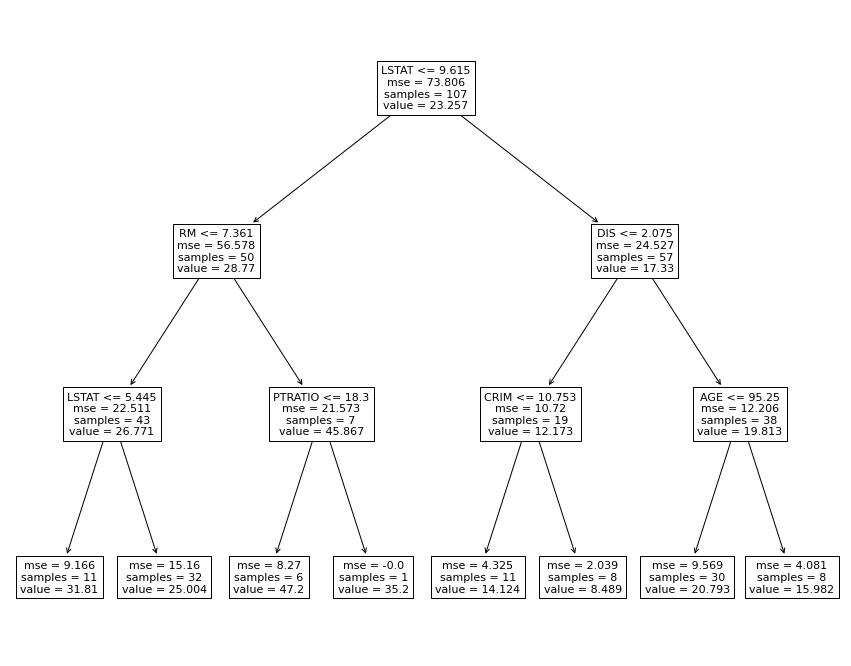

In [10]:
plt.figure(figsize = (15,12))
plot_tree(rf.estimators_[0], feature_names=boston.feature_names, class_names=boston.target);

In [11]:
rf.score(X_test, y_test)

0.7939639354598615

## Parameters' plots

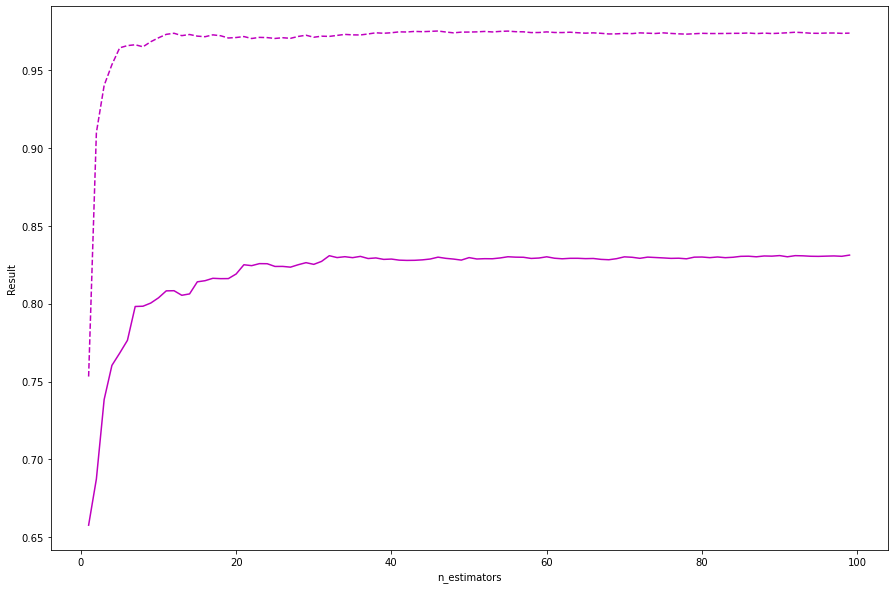

In [12]:
n_estimators = list(range(1,100))
rf_train_scores, rf_test_scores = [], []

for param in n_estimators:
    rf_est = RandomForestRegressor(n_estimators = param, random_state = 42).fit(X_train, y_train)
    rf_train_scores.append(rf_est.score(X_train, y_train))
    rf_test_scores.append(rf_est.score(X_test, y_test))
    
plt.figure(figsize = (15, 10))
plt.xlabel("n_estimators")
plt.ylabel("Result")

plt.plot(range(1,100, 1), rf_train_scores, 'm--')
plt.plot(range(1,100, 1), rf_test_scores, 'm');

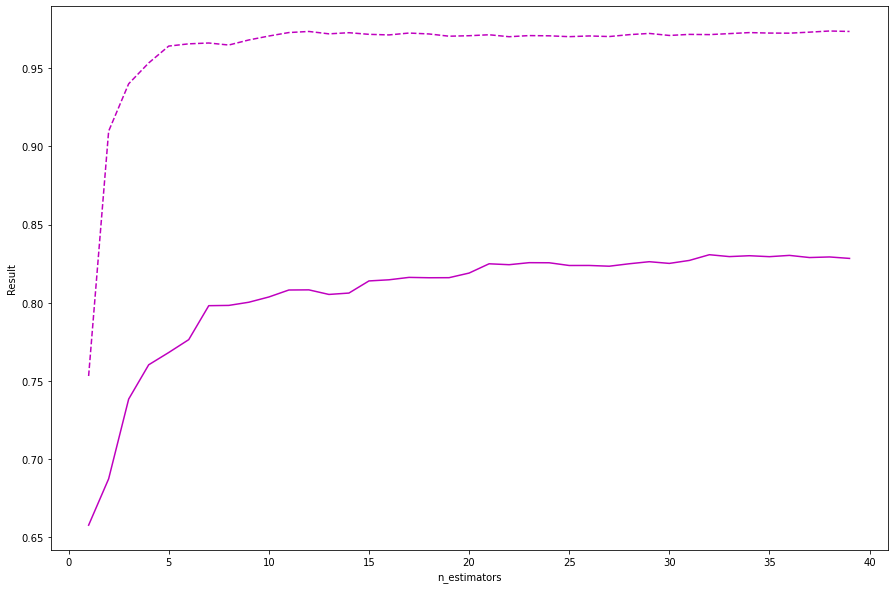

In [13]:
n_estimators = list(range(1,40))
rf_train_scores, rf_test_scores = [], []

for param in n_estimators:
    rf_est = RandomForestRegressor(n_estimators = param, random_state = 42).fit(X_train, y_train)
    rf_train_scores.append(rf_est.score(X_train, y_train))
    rf_test_scores.append(rf_est.score(X_test, y_test))
    
plt.figure(figsize = (15, 10))
plt.xlabel("n_estimators")
plt.ylabel("Result")

plt.plot(range(1,40, 1), rf_train_scores, 'm--')
plt.plot(range(1,40, 1), rf_test_scores, 'm');

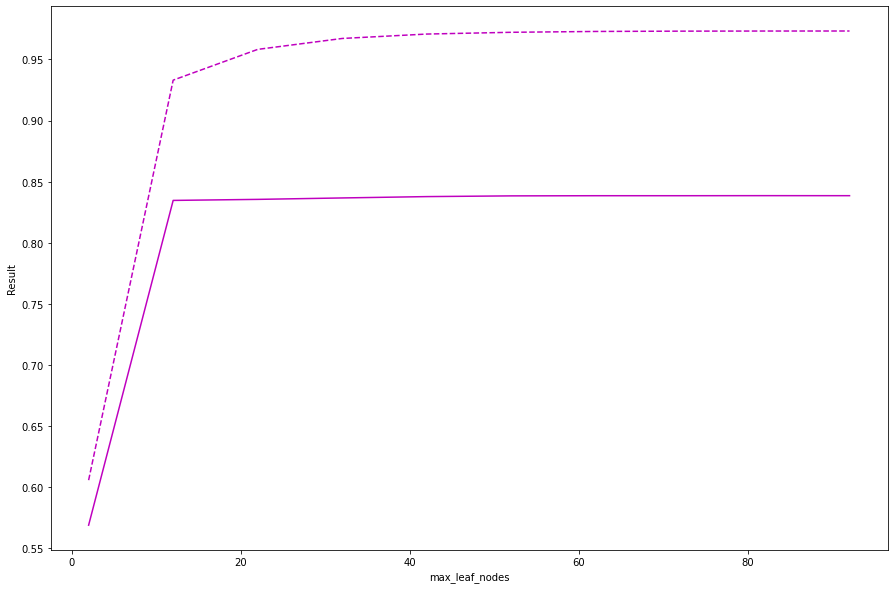

In [14]:
max_leaf_nodes = list(range(2, 100, 10))
rf_train_scores, rf_test_scores = [], []

for param in max_leaf_nodes:
    rf_lf = RandomForestRegressor(max_leaf_nodes = param, random_state = 42).fit(X_train, y_train)
    rf_train_scores.append(rf_lf.score(X_train, y_train))
    rf_test_scores.append(rf_lf.score(X_test, y_test))
    
plt.figure(figsize = (15, 10))
plt.xlabel("max_leaf_nodes")
plt.ylabel("Result")

plt.plot(range(2, 100, 10), rf_train_scores, 'm--')
plt.plot(range(2, 100, 10), rf_test_scores, 'm');

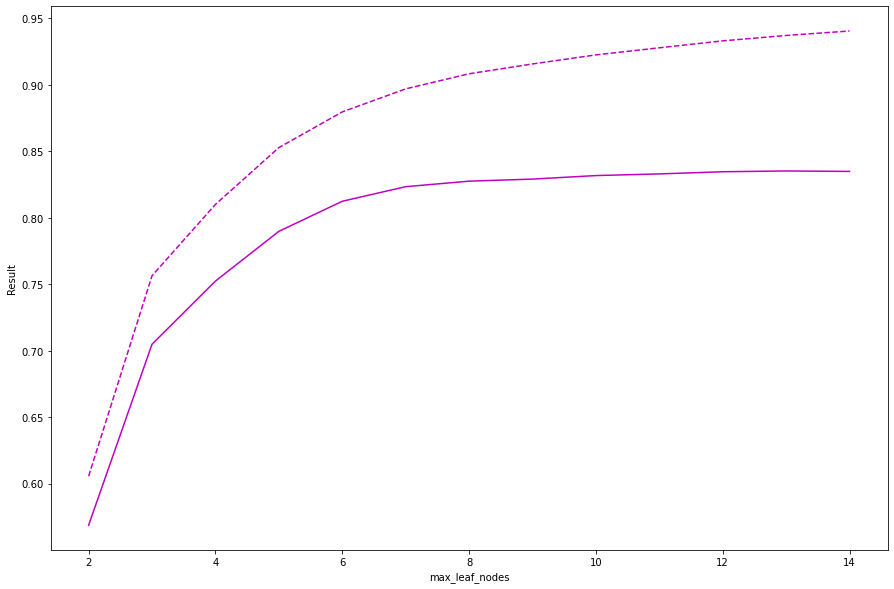

In [15]:
max_leaf_nodes = list(range(2, 15, 1))
rf_train_scores, rf_test_scores = [], []

for param in max_leaf_nodes:
    rf_lf = RandomForestRegressor(max_leaf_nodes = param, random_state = 42).fit(X_train, y_train)
    rf_train_scores.append(rf_lf.score(X_train, y_train))
    rf_test_scores.append(rf_lf.score(X_test, y_test))
    
plt.figure(figsize = (15, 10))
plt.xlabel("max_leaf_nodes")
plt.ylabel("Result")

plt.plot(range(2, 15, 1), rf_train_scores, 'm--')
plt.plot(range(2, 15, 1), rf_test_scores, 'm');

In [16]:
rf = RandomForestRegressor(n_estimators = 20, max_leaf_nodes = 8, bootstrap=True, random_state=1)
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.8288892368018976

# Random Search

In [17]:
def grid_combination(grid):
    total_params = 1 
    for par in grid:
        total_params  = total_params * len(grid[par])
    return total_params


param_grid = {"min_samples_split":list(range(1,6)),
              "max_leaf_nodes":[3, None],
              "n_estimators":[10,50,100,200],
              "min_samples_leaf":[1,3,5]}

print(param_grid)
print(f'Number of all combinations: {grid_combination(param_grid)}')

{'min_samples_split': [1, 2, 3, 4, 5], 'max_leaf_nodes': [3, None], 'n_estimators': [10, 50, 100, 200], 'min_samples_leaf': [1, 3, 5]}
Number of all combinations: 120


In [18]:
clf = RandomForestRegressor()

random_search = RandomizedSearchCV(clf, param_distributions=param_grid, cv=4, n_iter=50, verbose=1)
random_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-

/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-

/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-

/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-

/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-

/Users/kingaklejne/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.77011432 0.78095166 0.74924832        nan 0.65316325 0.77920207
 0.74655332 0.64553789 0.65529429 0.62967837 0.77145136 0.77401665
 0.65494007 0.7845039  0.64743798 0.74267378        nan 0.65000729
 0.76231136 0.75238746 0.6400219  0.6535939         nan 0.76996956
 0.65179633 0.77172565 0.65631245 0.78379613 0.78172858        nan
 0.7724497  0.64725458 0.64479547 0.63750938 0.64554524 0.75289579
 0.7513534         nan 0.70316063 0.64719242 0.64691043 0.75724043
 0.63733157 0.7832091  0.76524567 0.78074707 0.6389832  0.75107155
 0.63704213 0.62719664]
  warnings.warn(


RandomizedSearchCV(cv=4, estimator=RandomForestRegressor(), n_iter=50,
                   param_distributions={'max_leaf_nodes': [3, None],
                                        'min_samples_leaf': [1, 3, 5],
                                        'min_samples_split': [1, 2, 3, 4, 5],
                                        'n_estimators': [10, 50, 100, 200]},
                   verbose=1)

In [19]:
ranks = random_search.cv_results_['rank_test_score']
ranks.sort()
n = 5
for i in range(n):
    print(random_search.cv_results_['params'][ranks[i]])

{'n_estimators': 100, 'min_samples_split': 3, 'min_samples_leaf': 1, 'max_leaf_nodes': None}
{'n_estimators': 10, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_leaf_nodes': None}
{'n_estimators': 200, 'min_samples_split': 1, 'min_samples_leaf': 1, 'max_leaf_nodes': 3}
{'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_leaf_nodes': 3}
{'n_estimators': 200, 'min_samples_split': 4, 'min_samples_leaf': 1, 'max_leaf_nodes': None}


In [20]:
random_search.best_score_

0.784503897824797

# Grid Search

In [21]:
param_grid2 = {"n_estimators": [5,15,35,45,55],
               "min_samples_split": [2,3,5,8,20],
               "max_leaf_nodes": [100,150,200,300],
               "min_samples_leaf": [3,5,8,15]}

In [22]:
clf = RandomForestRegressor()
grid_search = GridSearchCV(clf, param_grid=param_grid2, cv=5, verbose=1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_leaf_nodes': [100, 150, 200, 300],
                         'min_samples_leaf': [3, 5, 8, 15],
                         'min_samples_split': [2, 3, 5, 8, 20],
                         'n_estimators': [5, 15, 35, 45, 55]},
             verbose=1)

In [23]:
grid_search.best_params_

{'max_leaf_nodes': 150,
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 55}

In [24]:
grid_search.best_score_

0.8048827380136432

In [25]:
model = RandomForestRegressor(**grid_search.best_params_)
model.fit(X_train, y_train)
print('Score on the test set: ', model.score(X_test, y_test))

Score on the test set:  0.8177298646446193
